## WTP_influent_data model development

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib as mb

In [2]:
#water treatment plant influent geosmin entries
wtp_influent_geosmin = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/wtp_influent_geosmin.csv')

wtp_influent_geosmin = wtp_influent_geosmin.drop(columns = ['SAMPLE_NUMBER','SAMPLING_POINT_DESCRIPTION','SITE','ANALYTE','Time','FACILITY','SAMPLED_DATE','DEPTH','Target'])

In [3]:
wtp_influent_geosmin

,SAMPLE_NAME,FORMATTED_ENTRY,UNITS,Date
0,PL-MAR-INF,7.77,ng/L,1/17/2013
1,PL-MAR-INF,6.14,ng/L,1/28/2013
2,PL-MAR-INF,6.10,ng/L,2/12/2013
3,PL-MAR-INF,4.29,ng/L,2/20/2013
4,PL-MAR-INF,3.60,ng/L,2/26/2013
...,...,...,...,...
143,PL-MAR-INF,2.00,ng/L,5/10/2022
144,PL-MAR-INF-4,2.00,ng/L,5/19/2022
145,PL-MAR-INF,2.00,ng/L,5/26/2022
146,PL-MAR-INF,2.00,ng/L,6/2/2022


#### Import the following dataframes that were compiled previously:
1. df_final_wo_nut - this is the datafile with the following categories: 
'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)'.

 2. df_full - this is the nutrient concentration from 10/3/2019 to 6/30/2022 that will be added to df_final_wo_nut to make df_final_w_nut.
 Has the following categories: 'Adjusted TOC, MS above Conf.',
 'Adjusted TP, MS above Conf.',
 'Adjusted turbidity, MS above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield'.

In [4]:
df_final_wo_nut = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/df_final_wo_nut.csv')
df_full = pd.read_csv(r'/Users/maanavjhatakia/Documents/Python.nosync/geosmin/df_full.csv')

df_final_wo_nut = df_final_wo_nut.drop(columns = ['Unnamed: 0'])
df_full = df_full.drop(columns = ['Unnamed: 0'])


#reset index and set new index to "date" for both major dataframes
df_final_wo_nut.reset_index(drop=True, inplace=True)
df_final_wo_nut = df_final_wo_nut.set_index(["Date"])

df_full.reset_index(drop=True, inplace=True)
df_full = df_full.set_index(["Date"])

wtp_influent_geosmin.reset_index(drop=True, inplace=True)
wtp_influent_geosmin = wtp_influent_geosmin.rename(columns = {'Date ':'Date'})
wtp_influent_geosmin = wtp_influent_geosmin.set_index(['Date'])

#merge between wtp influent geosmin concentration values and dataframe without nutrient concentrations to only get values from dates
result_wo_nut = pd.merge(df_final_wo_nut, wtp_influent_geosmin, on= "Date")

#### There is no difference in the target, so we can basically split the dataframe into 2 OLS models, one with all data and no nutrient concentrations and the other with data from 10/3/2019 onwards with all data + nutrient concentrations. 

#### From below, it looks like a Box-Cox transformation is most appropriate for transformating the wtp_influent_geosmin data.

/opt/anaconda3/envs/gds/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


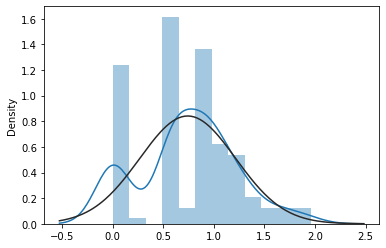

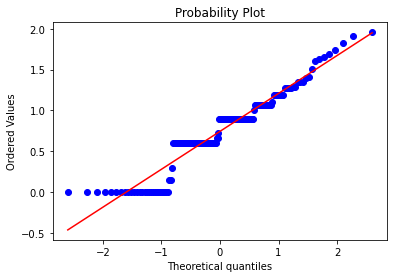

In [5]:
from scipy.stats import norm
from scipy import stats
from scipy.stats import boxcox 
import seaborn as sns
import matplotlib.pyplot as plt
import math

d = result_wo_nut['FORMATTED_ENTRY'] #path

transformed_data, best_lambda = boxcox(d)

sns.distplot(transformed_data, hist=True, kde=True, fit=norm)
fig = plt.figure()
res = stats.probplot(transformed_data, plot=plt)

In [6]:
#implement transformation 
result_wo_nut['FORMATTED_ENTRY'] = transformed_data

In [7]:
result_wo_nut

,Waterton Gage (cfs),"Temp Ch, C (high)",South Platte Above Cheesman Flowrate (cfs),South Platte Below Cheesman Downstream (cfs),Roberts Tunnel Flowrate (cfs),"Strontia Springs Temperature, high (C)",Conduit 20 to Marston Total (No Chatfield water),Conduit 20 (with Chatfield flow) (cfs),Marston WTP Outflow (cfs),Strontia Springs Outflow (cfs),"Marston Temperature, high (C)",SAMPLE_NAME,FORMATTED_ENTRY,UNITS
Date,,,,,,,,,,,,,,
1/17/2013,0.201626,11.7,2.592831,5.147494,88.450000,5.555556,6.740920,6.740920,5.953990,4.224934,10.555556,PL-MAR-INF,1.397960,ng/L
1/28/2013,0.249611,12.8,2.629230,4.867534,90.350000,12.222222,9.359487,9.359487,9.516302,4.819959,13.888889,PL-MAR-INF,1.289417,ng/L
2/12/2013,0.360188,5.6,3.096182,3.589059,73.289583,3.333333,9.732420,10.663958,12.617845,4.814864,-2.222222,PL-MAR-INF,1.286255,ng/L
2/20/2013,0.392010,1.7,3.345223,3.637586,71.429167,0.555556,8.666026,9.700515,11.989162,4.624973,4.444444,PL-MAR-INF,1.103137,ng/L
2/26/2013,0.299293,5.6,3.532004,3.929863,66.520833,-2.222222,6.624953,7.930322,10.011493,4.005513,3.888889,PL-MAR-INF,1.001809,ng/L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5/10/2022,0.312398,21.1,4.890349,4.804021,266.500000,20.000000,8.148006,8.148006,7.091544,4.564348,24.444444,PL-MAR-INF,0.605180,ng/L
5/19/2022,0.248967,31.7,5.552960,5.123964,194.166700,30.555556,8.160882,8.160882,6.941902,4.859812,26.666667,PL-MAR-INF-4,0.605180,ng/L
5/26/2022,0.244520,27.8,5.802118,4.897840,172.475000,26.666667,8.083316,8.083316,7.105632,4.969813,20.000000,PL-MAR-INF,0.605180,ng/L


In [8]:
x_names = result_wo_nut.columns.values.tolist()

In [9]:
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

x_vals_wo_nut = result_wo_nut[[
'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)'
 ]]

x_vals_wo_nut = StandardScaler().fit_transform(x_vals_wo_nut)
y_vals_wo_nut = result_wo_nut[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_wo_nut, y_vals_wo_nut)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x = sm.add_constant(x_vals_wo_nut) # adding a constant
 
model = sm.OLS(y_vals_wo_nut, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [0.74238132]
Coefficients: 
 [[-0.08057432 -0.17617469 -0.16513689  0.04680673  0.14504322  0.25768751
  -1.20109223  1.26900004  0.0058572  -0.24369719 -0.00570018]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     7.619
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           3.88e-10
Time:                        11:43:36   Log-Likelihood:                -64.060
No. Observations:                 148   AIC:                             152.1
Df Residuals:                     136   BIC:                             188.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std e

In [10]:
df_full['Adjusted TP, MS above Conf.'] = df_full['Adjusted TP, MS above Conf.'] + 1
df_full['Adjusted turbidity, MS above Conf.'] = df_full['Adjusted turbidity, MS above Conf.'] + 1
df_full['Adjusted TP, NF Above Conf.'] = df_full['Adjusted TP, NF Above Conf.'] + 1
df_full['Adjusted turbidity, NF Above Conf.'] = df_full['Adjusted turbidity, NF Above Conf.'] + 1.5
df_full['Adjusted TP, Downstream Strontia'] = df_full['Adjusted TP, Downstream Strontia'] + 1
df_full['Adjusted turbidity, Downstream Strontia'] = df_full['Adjusted turbidity, Downstream Strontia'] + 1.437
df_full['Adjusted TP, Upstream Strontia'] = df_full['Adjusted TP, Upstream Strontia'] + 1
df_full['Adjusted turbidity, Upstream Strontia'] = df_full['Adjusted turbidity, Upstream Strontia'] + 1
df_full['Adjusted TP, SP Below Chatfield'] = df_full['Adjusted TP, SP Below Chatfield'] + 1
df_full['Adjusted turbidity, SP Below Chatfield'] = df_full['Adjusted turbidity, SP Below Chatfield'] + 2.5

#transformations
df_full['Adjusted TOC, MS above Conf.'] = np.log(df_full['Adjusted TOC, MS above Conf.'])
df_full['Adjusted TP, MS above Conf.'] = np.log(df_full['Adjusted TP, MS above Conf.'])
df_full['Adjusted turbidity, MS above Conf.'] = np.sqrt(df_full['Adjusted turbidity, MS above Conf.'])

df_full['Adjusted TOC, NF Above Conf.'] = np.log(df_full['Adjusted TOC, NF Above Conf.'])
df_full['Adjusted TP, NF Above Conf.'] = np.log(df_full['Adjusted TP, NF Above Conf.'])
df_full['Adjusted turbidity, NF Above Conf.'] = np.log(df_full['Adjusted turbidity, NF Above Conf.'])

df_full['Adjusted TOC, Downstream Strontia'] = np.log(df_full['Adjusted TOC, Downstream Strontia'])
df_full['Adjusted TP, Downstream Strontia'] = np.sqrt(df_full['Adjusted TP, Downstream Strontia'])
df_full['Adjusted turbidity, Downstream Strontia'] = np.log(df_full['Adjusted turbidity, Downstream Strontia'])

df_full['Adjusted TOC, Upstream Strontia'] = np.sqrt(df_full['Adjusted TOC, Upstream Strontia'])
df_full['Adjusted TP, Upstream Strontia'] = np.log(df_full['Adjusted TP, Upstream Strontia'])
df_full['Adjusted turbidity, Upstream Strontia'] = np.sqrt(df_full['Adjusted turbidity, Upstream Strontia'])

df_full['Adjusted TOC, SP Below Chatfield'] = np.sqrt(df_full['Adjusted TOC, SP Below Chatfield'])
# dropping Adjusted TP below chatfield - transformation not really possible 
df_full['Adjusted turbidity, SP Below Chatfield'] = np.log(df_full['Adjusted turbidity, SP Below Chatfield'])

In [11]:
#make a copy of df_final_wo_nut as (with) nutrient concentration

df_final_w_nut = df_final_wo_nut.copy()

df_full_val_w_nut = pd.merge(df_final_w_nut, df_full, on= "Date")
result_w_nut_wtp_inf = pd.merge(df_full_val_w_nut, wtp_influent_geosmin, on= "Date")

In [12]:
x_names_w_nut = result_w_nut_wtp_inf.columns.values.tolist()

In [13]:
#new OLS with nutrient concentrations 

from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

x_vals_w_nut = result_w_nut_wtp_inf[[
'Waterton Gage (cfs)',
 'Temp Ch, C (high) ',
 'South Platte Above Cheesman Flowrate (cfs)',
 'South Platte Below Cheesman Downstream (cfs) ',
 'Roberts Tunnel Flowrate (cfs)',
 'Strontia Springs Temperature, high (C)',
 'Conduit 20 to Marston Total (No Chatfield water) ',
 'Conduit 20 (with Chatfield flow) (cfs)',
 'Marston WTP Outflow (cfs)',
 'Strontia Springs Outflow (cfs)',
 'Marston Temperature, high (C)',
 'Adjusted TOC, MS above Conf.',
 'Adjusted TP, MS above Conf.',
 'Adjusted turbidity, MS above Conf.',
 'Adjusted TOC, NF Above Conf.',
 'Adjusted TP, NF Above Conf.',
 'Adjusted turbidity, NF Above Conf.',
 'Adjusted TOC, Downstream Strontia',
 'Adjusted TP, Downstream Strontia',
 'Adjusted turbidity, Downstream Strontia',
 'Adjusted TOC, Upstream Strontia',
 'Adjusted TP, Upstream Strontia',
 'Adjusted turbidity, Upstream Strontia',
 'Adjusted TOC, SP Below Chatfield',
 'Adjusted TP, SP Below Chatfield',
 'Adjusted turbidity, SP Below Chatfield'
 ]]

x_vals_w_nut = StandardScaler().fit_transform(x_vals_w_nut)
y_vals_w_nut = result_w_nut_wtp_inf[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut, y_vals_w_nut)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut = sm.add_constant(x_vals_w_nut) # adding a constant
 
model = sm.OLS(y_vals_w_nut, x_w_nut).fit()
predictions = model.predict(x_w_nut) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [4.52459016]
Coefficients: 
 [[ 0.19034014 -0.14492599 -0.62752604  0.67815246  0.2217374   0.33221662
  -5.6423074   6.08704358  0.35960271 -1.48753428 -0.10823403  0.64458185
  -0.26132492 -1.45826027  2.384426   -1.06981219 -2.25652013 -1.79356723
   5.73385191 -1.51284635 -3.10326188  2.42836332 -0.08986037  5.71488906
  -1.8162206   1.90792668]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     18.49
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           2.08e-13
Time:                        11:43:36   Log-Likelihood:                -89.679
No. Observations:                  61   AIC:                             233.4
Df Residuals:                      34   BIC:                             290.4
Df

### Step 8: Regional model influence - use the larger model with nutrient information

#### Region 1: Cheesman Reservoir area

In [14]:
x_vals_w_nut_ch = result_w_nut_wtp_inf[[
'South Platte Above Cheesman Flowrate (cfs)',
'South Platte Below Cheesman Downstream (cfs) ',  
'Adjusted TOC, MS above Conf.',
'Adjusted TP, MS above Conf.',
'Adjusted turbidity, MS above Conf.',
]]

x_vals_w_nut_ch = StandardScaler().fit_transform(x_vals_w_nut_ch)
y_vals_w_nut_ch = result_w_nut_wtp_inf[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_ch, y_vals_w_nut_ch)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut_ch = sm.add_constant(x_vals_w_nut_ch) # adding a constant
 
model = sm.OLS(y_vals_w_nut_ch, x_w_nut_ch).fit()
predictions = model.predict(x_w_nut_ch) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [4.52459016]
Coefficients: 
 [[-2.04763829  0.67844126 -0.30272941 -2.92179414 -1.72772628]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.402
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     7.400
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           2.29e-05
Time:                        13:35:44   Log-Likelihood:                -156.87
No. Observations:                  61   AIC:                             325.7
Df Residuals:                      55   BIC:                             338.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------

#### Region 2: Roberts Tunnel area

In [15]:
x_vals_w_nut_rt = result_w_nut_wtp_inf[[
'Roberts Tunnel Flowrate (cfs)',
'Adjusted TOC, NF Above Conf.',
'Adjusted TP, NF Above Conf.',
'Adjusted turbidity, NF Above Conf.',
]]

x_vals_w_nut_rt = StandardScaler().fit_transform(x_vals_w_nut_rt)
y_vals_w_nut_rt = result_w_nut_wtp_inf[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_rt, y_vals_w_nut_rt)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut_rt = sm.add_constant(x_vals_w_nut_rt) # adding a constant
 
model = sm.OLS(y_vals_w_nut_rt, x_w_nut_rt).fit()
predictions = model.predict(x_w_nut_rt) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [4.52459016]
Coefficients: 
 [[ 0.19808673  2.69752965  0.76615114 -2.46163218]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.331
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     6.920
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           0.000134
Time:                        13:36:38   Log-Likelihood:                -160.31
No. Observations:                  61   AIC:                             330.6
Df Residuals:                      56   BIC:                             341.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

#### Region 3: Strontia Springs area

In [16]:
x_vals_w_nut_ss = result_w_nut_wtp_inf[[
'Strontia Springs Temperature, high (C)',
'Strontia Springs Outflow (cfs)',
'Conduit 20 to Marston Total (No Chatfield water) ',
'Conduit 20 (with Chatfield flow) (cfs)',
'Adjusted TOC, Downstream Strontia',
'Adjusted TP, Downstream Strontia',
'Adjusted turbidity, Downstream Strontia',
'Adjusted TOC, Upstream Strontia',
'Adjusted TP, Upstream Strontia',
'Adjusted turbidity, Upstream Strontia',
]]

x_vals_w_nut_ss = StandardScaler().fit_transform(x_vals_w_nut_ss)
y_vals_w_nut_ss = result_w_nut_wtp_inf[['FORMATTED_ENTRY']]

#with sklearn
regr = linear_model.LinearRegression()
regr.fit(x_vals_w_nut_ss, y_vals_w_nut_ss)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
x_w_nut_ss = sm.add_constant(x_vals_w_nut_ss) # adding a constant
 
model = sm.OLS(y_vals_w_nut_ss, x_w_nut_ss).fit()
predictions = model.predict(x_w_nut_ss) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 [4.52459016]
Coefficients: 
 [[ 0.37109334  1.91806685 -0.4619146  -0.43573594 -2.04016082  0.01445578
   2.33263563  0.99735668 -0.63998311 -3.80754012]]
                            OLS Regression Results                            
Dep. Variable:        FORMATTED_ENTRY   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.350
Method:                 Least Squares   F-statistic:                     4.224
Date:                Thu, 22 Dec 2022   Prob (F-statistic):           0.000283
Time:                        13:37:19   Log-Likelihood:                -153.88
No. Observations:                  61   AIC:                             329.8
Df Residuals:                      50   BIC:                             353.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          